CASO 2

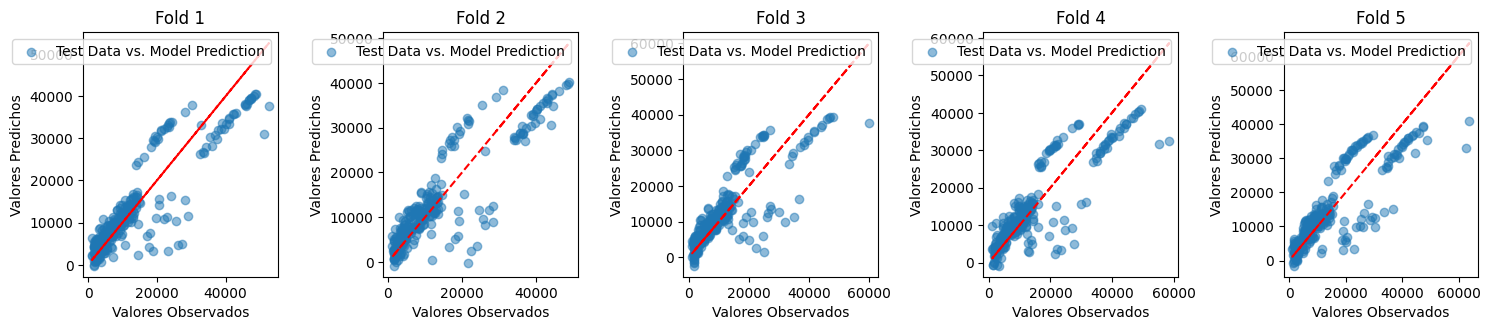

MSE promedio para K-Fold CV: 36686587.6234814
MSE de cada pliegue: [32034379.78277082, 32856223.88154084, 36965035.60669352, 37122762.8220601, 44454536.024341695]


In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children','smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Método 1: K-Fold Cross-Validation
k = 5  # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo en el conjunto de entrenamiento
    modelo_fitted = modelo.fit()

    # Predecir sobre el conjunto de prueba
    y_pred = modelo_fitted.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(y_test, y_pred, label='Test Data vs. Model Prediction', alpha=0.5)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Línea de identidad
    plt.title(f'Fold {fold}')
    plt.xlabel('Valores Observados')
    plt.ylabel('Valores Predichos')
    plt.legend()
    fold += 1

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados
plt.show()

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print("MSE de cada pliegue:", mse_scores)

#k=3, 36680455.99149378
#K=5, 36686587.6234814
#k=10,36692305.93968387
#k=15,36691072.50789375
#k=20,36701485.92775258

Según lo anterior las variables ‘age’, ‘bmi’, ‘children’ y ‘smoker’ son todas significativas para predecir los cargos de seguro. Esto indica que estos factores deben ser considerados cuidadosamente al diseñar políticas de precios y productos de seguros. El MSE promedio obtenido a través de la validación cruzada K-Fold es relativamente alto, lo que sugiere que el modelo puede no estar capturando toda la complejidad de los datos. Para mejorar el modelo en el siguiente código se explora la inclusión de variables adicionales como ‘sex’ y ‘region’, que podrían tener un impacto en los cargos del seguro. Si decimos que da mucho MSE tiene sentido que de grande porque hay muchos valores concentrados a la derecha y a la izquierda y son muy pocos los que estan en la recta. Se observa que con diferentes valores de k el MSE continua siendo similar en todos los casos.

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cargar datos
df = pd.read_csv('insurance.csv')

# Convertir 'smoker' a variable binaria (1 para 'yes', 0 para 'no')
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Convertir las variables categóricas 'sex' y 'region' en variables dummy
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

# Agregar las columnas 'sex_female' y 'region_northeast'
df['sex_female'] = 1 - df['sex_male']  # 1 if female, 0 otherwise
df['region_northeast'] = 1 - df['region_northwest'] - df['region_southeast'] - df['region_southwest']  # 1 if northeast, 0 otherwise

# Seleccionar variables independientes y dependiente
X = df[['age', 'bmi', 'children', 'smoker', 'sex_female', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Convertir los datos a arrays de NumPy
X = X.to_numpy()
y = y.to_numpy()

# Asegurarse de que todas las variables en X son de tipo numérico
X = X.astype(float)

# Agregar una constante a la matriz de características (para ajustar el intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal usando OLS (Mínimos cuadrados ordinarios)
modelo = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:26:37   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.013e+04    791.569    -12.792      0.0

Las variables ‘age’, ‘bmi’, ‘children’, ‘smoker’, ‘sex_female’, ‘region_northeast’, ‘region_northwest’, ‘region_southeast’ y ‘region_southwest’ son todas significativas para predecir los cargos de seguro. El MSE promedio obtenido a través de la validación cruzada K-Fold sigue siendo alto. El modelo es sensible a la dimensionalidad de los datos porque si estoy queriendo explicar los cargos tal vez falta una variable que explique realmente el comportamiento de los valores que pagan por el seguro.


Al aplicar Cross-Validation al modelo del caso 1 se observa que el MSE promedio es bastante alto, lo que indica que el modelo podría mejorarse, por lo tanto es necesario refinar. Para refinar el modelo se usa el siguiente código que se puede usar para eliminar o añadir factores al modelo. Este código también realiza un análisis exploratorio de datos y pruebas de hipótesis para cada coeficiente del modelo. En este caso, todas las variables parecen ser significativas, por lo que no es necesario eliminar ninguna.

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:37:11   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

c:\Users\DANIELA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DANIELA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DANIELA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DANIELA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

p-value for const: 1.630659486785494e-275
p-value for age: 2.9370265924654854e-274
p-value for bmi: 1.5383565479089667e-274
p-value for children: 1.642422871191252e-275
p-value for smoker: 1.5354226097474645e-275
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:37:18   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                       

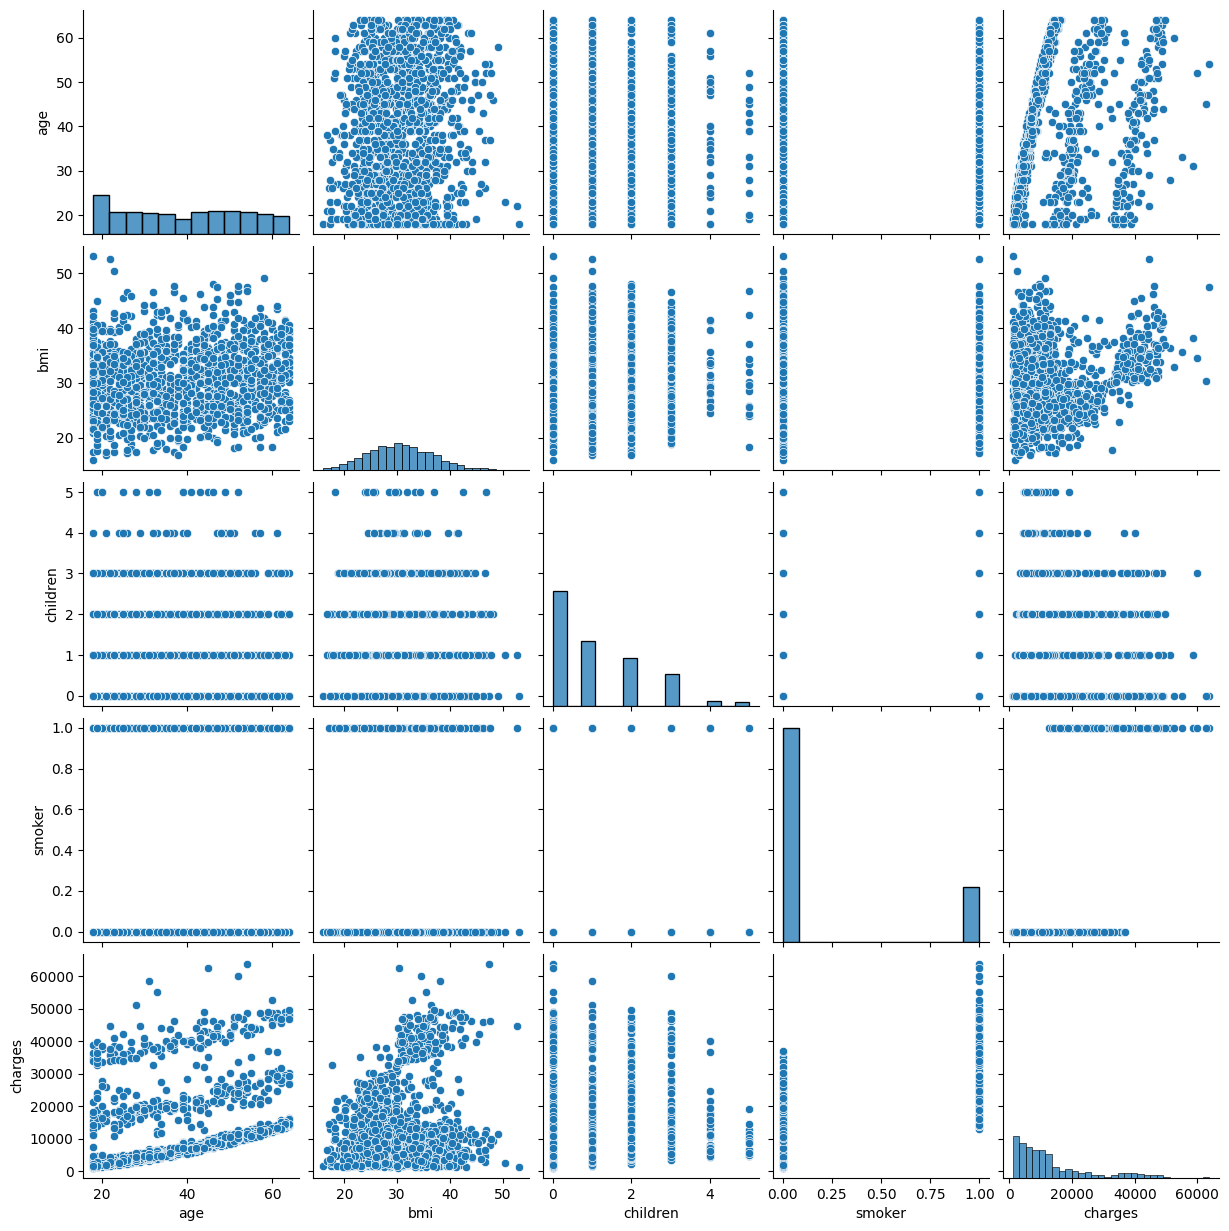

In [15]:
import seaborn as sns
from scipy import stats

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajustar el modelo en el conjunto de entrenamiento
modelo_fitted = modelo.fit()

# Imprimir el resumen del modelo
print(modelo_fitted.summary())

# Realizar un análisis exploratorio de datos (EDA)
sns.pairplot(df)

# Realizar pruebas de hipótesis para cada coeficiente
for column in X.columns:
    _, p_value = stats.ttest_ind(X[column], y)
    print(f"p-value for {column}: {p_value}")


# Reajustar el modelo y evaluar
modelo = sm.OLS(y, X)
modelo_fitted = modelo.fit()
print(modelo_fitted.summary())


Según el resumen del modelo, todas las variables (edad, IMC, hijos, fumador) son significativas en la predicción de los cargos, ya que todos los valores p son menores a 0.05. Esto significa que todas estas variables tienen un impacto significativo en los cargos del seguro. Transformar las variables puede mejorar el ajuste de tu modelo. El siguiente código transforma las variables ‘age’ y ‘bmi’ aplicando el logaritmo natural y la raíz cuadrada. Observando los resultados, todas las variables (edad, IMC, hijos, fumador) siguen siendo significativas en la predicción de los cargos, ya que todos los valores p son menores a 0.05.

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Transformar las variables
df['age'] = np.log(df['age'])
df['bmi'] = np.sqrt(df['bmi'])

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajustar el modelo en el conjunto de entrenamiento
modelo_fitted = modelo.fit()

# Imprimir el resumen del modelo
print(modelo_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     964.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:43:46   Log-Likelihood:                -13568.
No. Observations:                1338   AIC:                         2.715e+04
Df Residuals:                    1333   BIC:                         2.717e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.418e+04   2180.833    -20.257      0.0

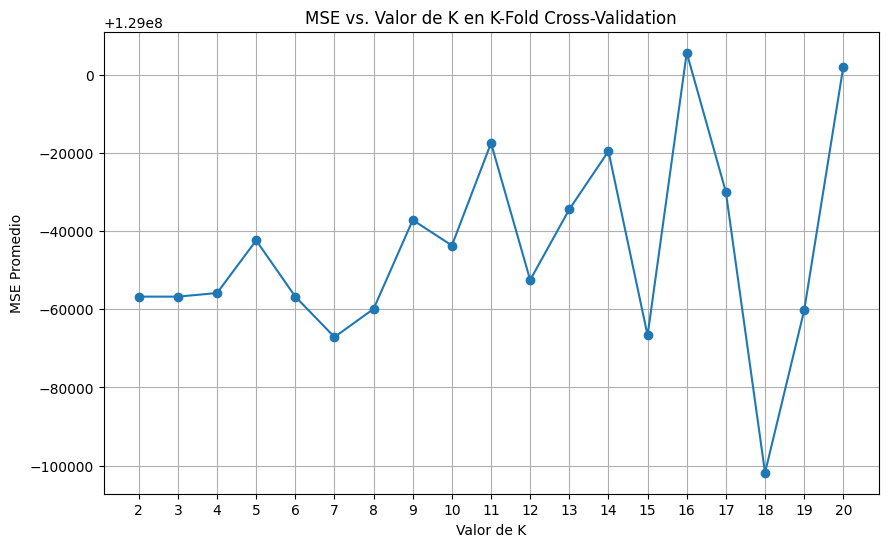

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Definir una lista para almacenar los MSE de cada iteración
mse_values = []

# Definir una lista para almacenar los valores de K
k_values = range(2, 21)  # Rango de valores de K que quieres probar

# Realizar la validación cruzada para diferentes valores de K
for k in k_values:
    # Inicializar K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    # Lista para almacenar los MSE de cada pliegue
    mse_scores = []
    
    # Realizar la validación cruzada
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Ajustar el modelo en el conjunto de entrenamiento
        modelo_fitted = modelo.fit()

        # Predecir sobre el conjunto de prueba
        y_pred = modelo_fitted.predict(X_test)

        # Calcular el Error Cuadrático Medio (MSE) para este pliegue
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)
    
    # Calcular el MSE promedio para este valor de K
    mean_mse = np.mean(mse_scores)
    
    # Almacenar el MSE promedio en la lista de valores de MSE
    mse_values.append(mean_mse)

# Graficar los valores de MSE en función de los valores de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. Valor de K en K-Fold Cross-Validation')
plt.xlabel('Valor de K')
plt.ylabel('MSE Promedio')
plt.xticks(k_values)
plt.grid(True)
plt.show()

La gráfica indica que el MSE varía con diferentes valores de K. Esto sugiere que la elección del número de pliegues puede influir significativamente en la evaluación del modelo. Sin embargo, un valor muy alto de K puede llevar a una mayor variabilidad en las estimaciones del MSE debido a un menor tamaño de los conjuntos de prueba.
Se debe proceder con cautela al utilizar este modelo para tomar decisiones de negocio.

¿Cuál es el mejor modelo? ¿Tiene sentido los factores que quedaron luego del refinamiento? 

El modelo que incluye las variables ‘age’, ‘bmi’, ‘children’, ‘smoker’, ‘sex_female’, ‘region_northeast’, ‘region_northwest’, ‘region_southeast’ y ‘region_southwest’ parece ser el mejor modelo basado en los resultados. Este modelo tiene un R-cuadrado de 0.751, lo que indica que alrededor del 75.1% de la variabilidad en los cargos se puede explicar con este modelo. Por ejemplo, es razonable que la edad y si una persona fuma o no, tengan un impacto significativo en los cargos del seguro. Además, la inclusión de la variable de género y región puede capturar más variabilidad en los cargos, lo que podría ser relevante en ciertos contextos de negocio. Recordar que el cross validation no da la ultima palabra, da las mejores combinaciones de variables para una mejor regresion, basado en diferentes parametros de rendimiento como el R2.


¿Qué decisión tomarían según sus resultados para resolver la pregunta/problema de negocio? 

Con base en los resultados del modelo, una compañía de seguros podría considerar factores como la edad, el IMC, el número de hijos, si la persona es fumadora, el género y la región al establecer los cargos de seguro. Por ejemplo, podrían cobrar primas más altas a los fumadores y a las personas mayores debido a su mayor riesgo. Cualquier decisión deL negocio debe tener en cuenta no solo los resultados del modelo, sino también otros factores importantes como las regulaciones de la industria, las consideraciones éticas y las preferencias de los clientes. Si el modelo da bien, pero en terminos del negocio no agrega valor, es mejor no considerarlo para la toma de decisiones.

BONO

In [ ]:
import numpy as np

# Supongamos que tienes tus datos en un DataFrame de pandas llamado 'df'
# Asegúrate de que 'df' contiene tus características (X) y la variable objetivo (y)

# Seleccionar las primeras 100 observaciones de la base de datos
subset_data = df.head(100)

# Extraer la variable objetivo (y) de las primeras 100 observaciones
data = subset_data['charges'].values

# Número de muestras Bootstrap a generar
num_bootstrap_samples = 5000

# Tamaño de la muestra Bootstrap (igual al tamaño de los datos originales)
bootstrap_sample_size = len(data)

# Lista para almacenar las medias de las muestras Bootstrap
bootstrap_means = []

# Realizar muestras Bootstrap y calcular las medias
for _ in range(num_bootstrap_samples):
    # Generar una muestra Bootstrap (con reemplazo)
    bootstrap_sample = np.random.choice(data, size=bootstrap_sample_size, replace=True)
    # Calcular la media de la muestra Bootstrap y añadirla a la lista
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calcular el intervalo de confianza del 95% para la media utilizando percentiles
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print("Intervalo de confianza del 95% para la media:", (lower_bound, upper_bound))

Intervalo de confianza del 95% para la media: (12039.276317635, 17276.636974562498)


Se quiso hacer uso de boostraps con un total de muestras de 5000 para poder estimar la verdadera media de la variable dependiente 'charges' y se halló que con un 95% de confianza se encuentra entre el intervalo de (12039.27-17276.63). Esto nos ayuda a poder inferir la media poblacional real para la variable charges.

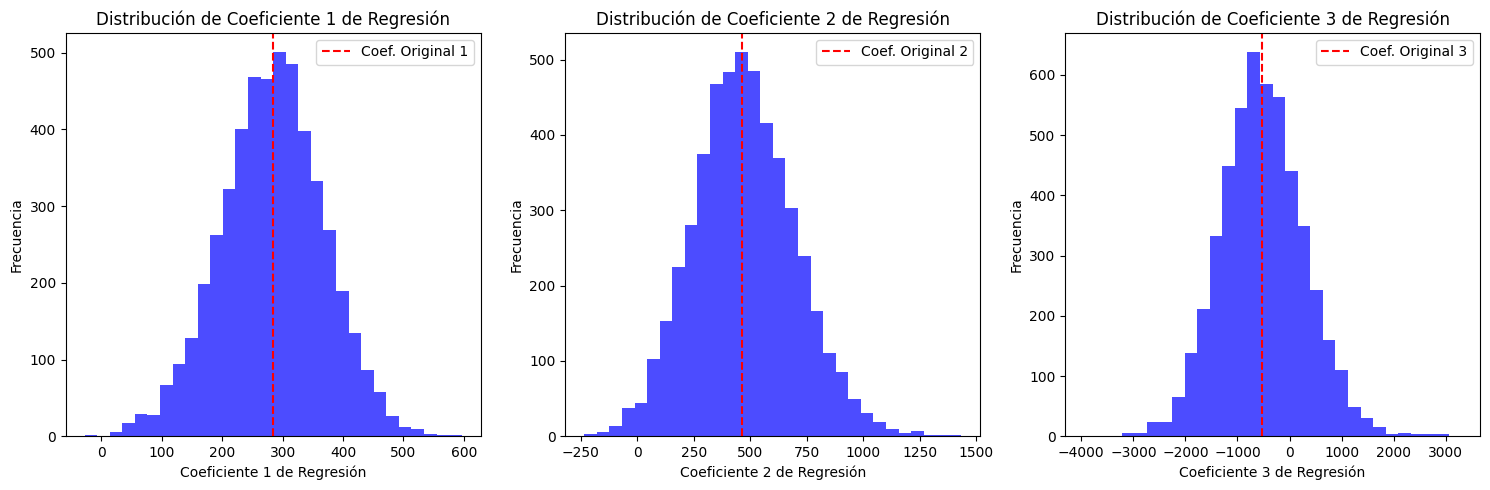

Resultados de los coeficientes Bootstrap:
Coeficiente 1: Media = 283.0739, Desviación Estándar = 85.1816
Coeficiente 2: Media = 474.1855, Desviación Estándar = 224.3660
Coeficiente 3: Media = -513.9129, Desviación Estándar = 804.7487


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supongamos que tienes tus datos en un DataFrame de pandas llamado 'df'
# Asegúrate de que 'df' contiene tus características (X) y la variable objetivo (y)

# Seleccionar las primeras 100 observaciones de la base de datos original
subset_data = df.head(100)

# Extraer las características y la variable objetivo de las primeras 100 observaciones
X_subset = subset_data[['age', 'bmi', 'children']]
y_subset = subset_data['charges']

# Ajustar un modelo de regresión lineal múltiple a los datos originales
model = LinearRegression()
model.fit(X_subset, y_subset)
coef_originales = model.coef_
intercept_original = model.intercept_

# Aplicar Bootstrap para estimar los coeficientes de regresión múltiple
num_bootstrap_samples = 5000  # Número de muestras Bootstrap 
bootstrap_coefs = []
bootstrap_intercept = []

for _ in range(num_bootstrap_samples):
    # Generar una muestra bootstrap
    bootstrap_data = subset_data.sample(frac=1, replace=True)  # Mezclar y tomar muestras con reemplazo
    X_bootstrap = bootstrap_data[['age', 'bmi', 'children']]
    y_bootstrap = bootstrap_data['charges']

    # Ajustar un modelo de regresión lineal múltiple a la muestra bootstrap
    model.fit(X_bootstrap, y_bootstrap)
    bootstrap_coefs.append(model.coef_)
    bootstrap_intercept.append(model.intercept_)

# Visualizar las distribuciones de los coeficientes de regresión múltiple
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    plt.hist(bootstrap_coefs_i, bins=30, color='blue', alpha=0.7)
    plt.axvline(x=coef_originales[i], color='red', linestyle='--', label=f'Coef. Original {i + 1}')
    plt.xlabel(f'Coeficiente {i + 1} de Regresión')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de Coeficiente {i + 1} de Regresión')
    plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados de los coeficientes Bootstrap
print("Resultados de los coeficientes Bootstrap:")
for i, coef_name in enumerate(['Coeficiente 1', 'Coeficiente 2', 'Coeficiente 3']):
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    mean_coef_bootstrap = np.mean(bootstrap_coefs_i)
    std_coef_bootstrap = np.std(bootstrap_coefs_i)
    print(f"{coef_name}: Media = {mean_coef_bootstrap:.4f}, Desviación Estándar = {std_coef_bootstrap:.4f}")


Para este apartado se quiso conocer el coeficiente y las desviaciones estándar de las 3 variables independientes, estas son age, bmi, children. 

Referencia de la Base de Datos

Choi, M. (2018). Medical Cost Personal Datasets [Data set]. Kaggle. https://www.kaggle.com/datasets/mirichoi0218/insurance